In [1]:
import pandas as pd
from pathlib import Path

# df = pd.read_pickle("/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/44_cpus/faro_sum_old_model/metrics_with_worker.pkl.gz")
df = pd.read_pickle("/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_2000_avgproc_min_int5m_reduced_6hr_augmented/36_cpus/faro_sum/metrics_with_worker.pkl.gz")
# df = pd.read_pickle("/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/profiles/resnet34/serve_out.pkl")

FileNotFoundError: [Errno 2] No such file or directory: '/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_2000_avgproc_min_int5m_reduced_6hr_augmented/36_cpus/faro_sum/metrics_with_worker.pkl.gz'

In [10]:
handle_df = df[(df.method == "HANDLE") & (df.status == "OK")]
print(len(handle_df))
handle_df

2236


,cluster,method,status,latency_ms
2236,worker-wpv6q,HANDLE,OK,147.4
2237,worker-wpv6q,HANDLE,OK,152.1
2238,worker-wpv6q,HANDLE,OK,113.4
2239,worker-wpv6q,HANDLE,OK,112.1
2240,worker-wpv6q,HANDLE,OK,109.9
...,...,...,...,...
4467,worker-wpv6q,HANDLE,OK,105.2
4468,worker-wpv6q,HANDLE,OK,114.4
4469,worker-wpv6q,HANDLE,OK,107.2
4470,worker-wpv6q,HANDLE,OK,111.1


In [11]:
df[(df.method == "POST") & (df.status == "200")].latency_ms.median()

117.4

In [12]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
import simulation.distribution as dist

values = handle_df.latency_ms.values / 1000
params = scipy.stats.lognorm.fit(values)
print(params)

# plt.hist(values, label="original", histtype="step", density=True)
# generated = scipy.stats.lognorm(params[0], loc=params[1], scale=params[2]).rvs(len(values)*30)
# plt.hist(generated, label="generated", histtype="step", density=True)
# lognorm = dist.LogNormDistribution(*params)
# dist_generated = [lognorm.draw() for _ in range(len(values)*20)]
# plt.hist(dist_generated, label="dist_generated", histtype="step", density=True)

# plt.legend()

(0.3664533843565315, 0.09083723064472476, 0.017676509236062347)


In [13]:
# print(np.percentile(generated, 95))
# print(np.percentile(dist_generated, 95))
print(np.percentile(values, 95))
print(np.mean(values))

0.125025
0.10976131484794276


In [6]:
dir_path = Path("/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented")

handles_df = []

for i, p in enumerate(dir_path.glob("**/metrics_with_worker.pkl.gz")):
    print(p)
    df = pd.read_pickle(p)
    handle_df = df[((df.method == "HANDLE") & (df.status == "OK"))]
    handles_df.append(handle_df)

handles_df = pd.concat(handles_df)

handles_df.latency_ms.mean()

/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/32_cpus/aiad/metrics_with_worker.pkl.gz
/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/32_cpus/mark_diff_order/metrics_with_worker.pkl.gz
/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/32_cpus/faro_sum/metrics_with_worker.pkl.gz
/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/40_cpus/aiad/metrics_with_worker.pkl.gz
/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/40_cpus/oneshot/metrics_with_worker.pkl.gz
/home/beomyeol/Workspace/ibm/faro/results/faro-us-south/resnet34/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/36_cpus/aiad/metrics_with_worker

165.33158830318843

(0.3602186151645037, 0.07286179915989166, 0.0866923686839878)
0.1603
0.2298
0.1653315883031811


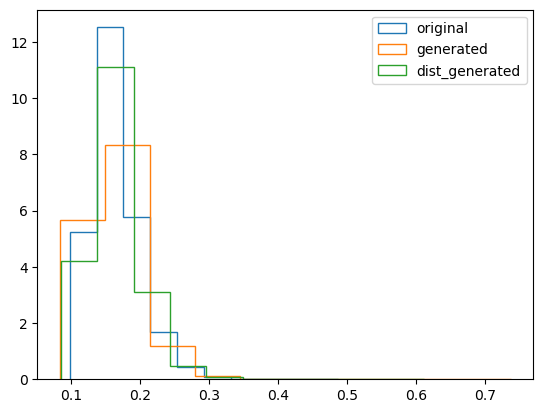

In [7]:
values = handles_df.latency_ms.values / 1000
params = scipy.stats.lognorm.fit(values)
print(params)

print(np.percentile(values, 50))
print(np.percentile(values, 95))
print(np.mean(values))

plt.hist(values, label="original", histtype="step", density=True)
generated = scipy.stats.lognorm(params[0], loc=params[1], scale=params[2]).rvs(len(values)*30)
plt.hist(generated, label="generated", histtype="step", density=True)
lognorm = dist.LogNormDistribution(*params)
dist_generated = [lognorm.draw() for _ in range(len(values)*20)]
plt.hist(dist_generated, label="dist_generated", histtype="step", density=True)

plt.legend()

(0.4807840738997673, 0.003485330525882586, 0.000987812095765591)
0.0045
0.004641167262969603


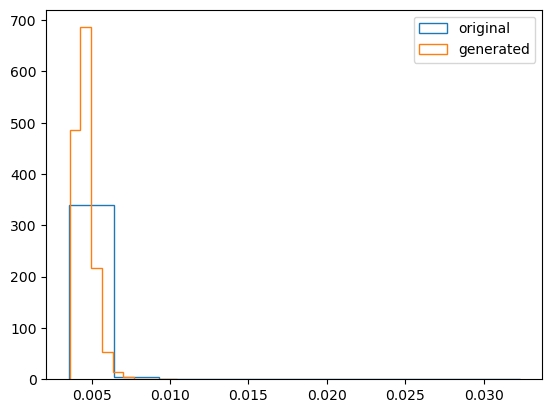

In [18]:
post_df = df[df.method == "POST"]
success_post_df = post_df[post_df.status == "200"]
success_handle_df = handle_df[handle_df.status == "OK"]

overheads = (
    success_post_df.latency_ms.reset_index(drop=True) -
    success_handle_df.latency_ms.reset_index(drop=True))

values = overheads / 1000 / 2
# values *= 1.5  # let's overestimate
params = scipy.stats.lognorm.fit(values)
print(params)
print(np.percentile(values, 50))
print(np.mean(values))

plt.hist(values, label="original", histtype="step", density=True)
generated = scipy.stats.lognorm(params[0], loc=params[1], scale=params[2]).rvs(len(values)*30)
plt.hist(generated, label="generated", histtype="step", density=True)

plt.legend()